In [21]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Bài 1

## Câu 1

In [22]:
df = pd.read_csv('iris/iris.data', header=None)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


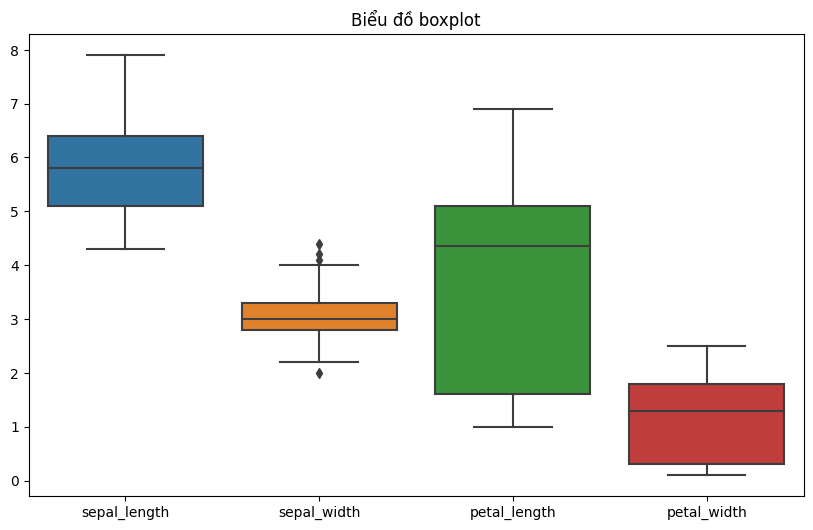

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :4])
plt.title("Biểu đồ boxplot")
plt.show()

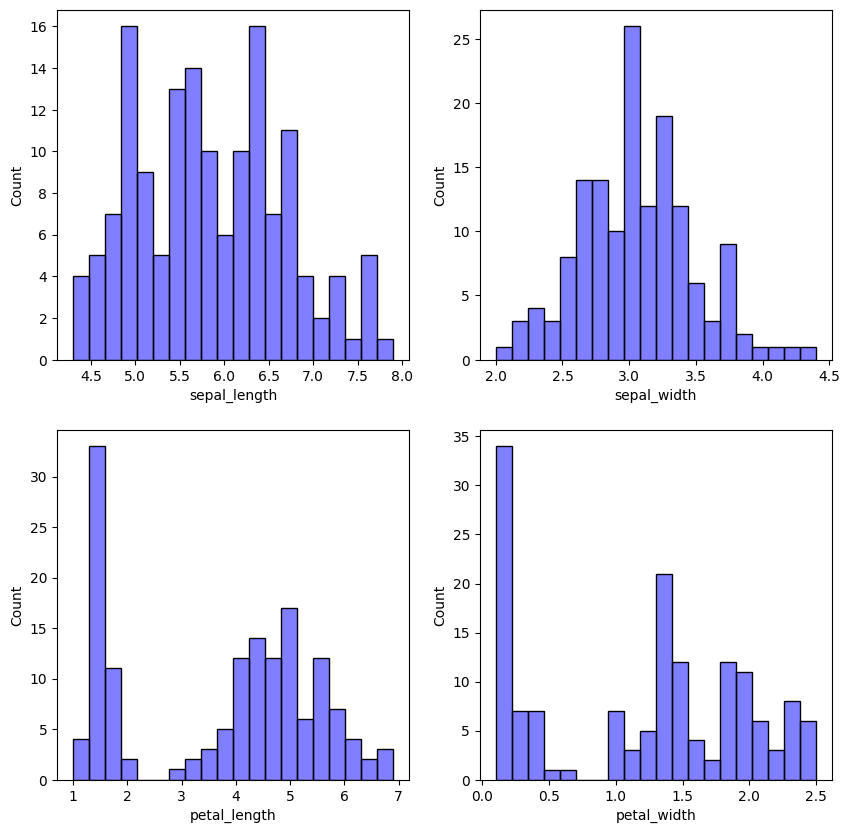

In [24]:
plt.figure(figsize=(10, 10))
for i in range(len(df.iloc[:, :4].columns)):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df.iloc[:, i], kde=False, bins=20, color='blue', alpha=0.5)
plt.show()

In [25]:
summary_stats = df.iloc[:, :4].describe()
print(summary_stats)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


## Câu 2

In [26]:
x = df.iloc[:, :4].values
y = df.iloc[:, 4:].values
y = LabelEncoder().fit_transform(y)
df["class"] = y
df.head()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [88]:
(df["sepal_length"].min(),
df["sepal_length"].max(),
df["sepal_width"].min(),
df["sepal_width"].max(),
df["petal_length"].min(),
df["petal_length"].max(),
df["petal_width"].min(),
df["petal_width"].max(),)


(4.3, 7.9, 2.0, 4.4, 1.0, 6.9, 0.1, 2.5)

## Câu 3

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3)

In [28]:
print("Dữ liệu có giá trị null:\n", df.isnull().sum())

Dữ liệu có giá trị null:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


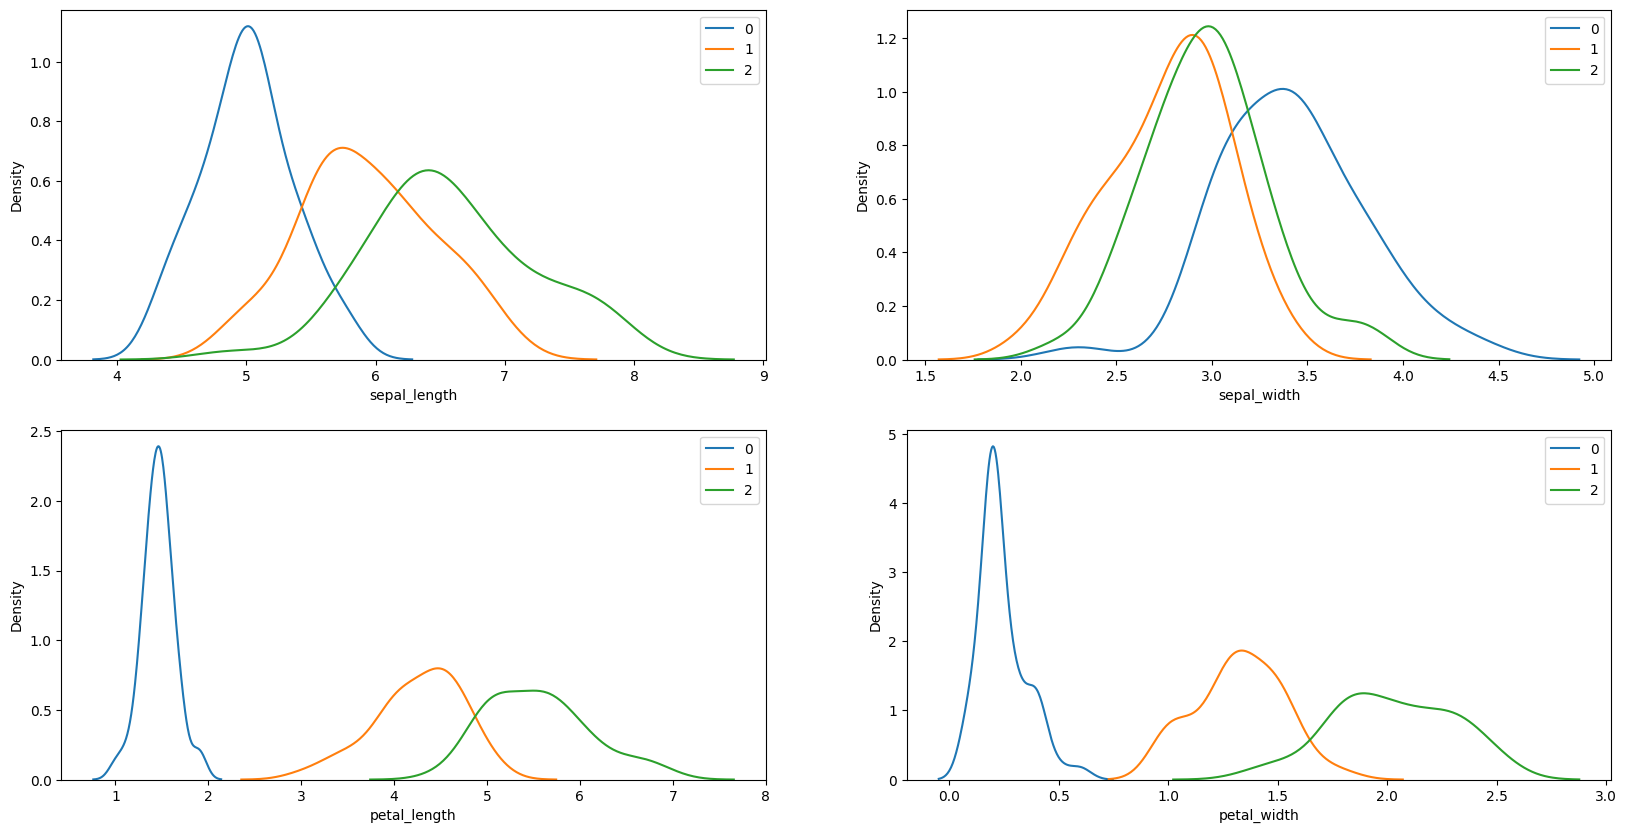

In [29]:
plt.figure(figsize=(20, 10))
for i in range(len(df.iloc[:, :4].columns)):
    plt.subplot(2, 2, i+1)
    for class_name in df['class'].unique():
        class_data = df[df['class'] == class_name]
        sns.kdeplot(class_data.iloc[:, i], label=class_name)
    plt.legend()
plt.show()

## Câu 4

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

kf = KFold(n_splits=5, shuffle=True)

score = cross_val_score(knn, x, y, cv=kf, scoring='accuracy')

print('Accuracy: ', score.mean())

Accuracy:  0.9666666666666666


## Câu 5, 6, 7, 8

In [72]:
class Model:
    def __init__(self, model, name):
        self.model = model
        self.name = name
        self.is_trained = False

    def fit(self, x_train, y_train, x_test, y_test):
        self.model.fit(x_train, y_train)
        y_pred = self.model.predict(x_test)
        self.accuracy = accuracy_score(y_test, y_pred)
        self.f1 = f1_score(y_test, y_pred, average='weighted')
        self.confusion_matrix = confusion_matrix(y_test, y_pred)
        self.is_trained = True

    def __repr__(self):
        if self.is_trained:
            return f"{self.name}:\n" \
                   f"Accuracy: {self.accuracy}\n" \
                   f"F1: {self.f1}\n" \
                   f"Confusion matrix: \n{self.confusion_matrix}\n"
        else:
            return f"{self.name} is not trained yet.\n"
        

models = [GaussianNB(),
          SVC(),
          LogisticRegression(solver='lbfgs', max_iter=1000),
          DecisionTreeClassifier(),
          ]

best_model = None
best_accuracy = 0
best_score = 0

for model in models:
    model_obj = Model(model, model.__class__.__name__)
    model_obj.fit(x_train, y_train, x_test, y_test)
    print(model_obj)

    scores = cross_val_score(model, x_train, y_train, cv=5)
    print(f"Cross validation scores: {scores.mean()}\n")

    if model_obj.accuracy > best_accuracy:
        best_model = model_obj
        best_accuracy = model_obj.accuracy
        best_score = scores.mean()
    elif model_obj.accuracy == best_accuracy:
        if scores.mean() > best_score:
            best_model = model_obj
            best_accuracy = model_obj.accuracy
            best_score = scores.mean()
        

GaussianNB:
Accuracy: 0.9777777777777777
F1: 0.9777493969064851
Confusion matrix: 
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]

Cross validation scores: 0.9428571428571428

SVC:
Accuracy: 0.9777777777777777
F1: 0.9777493969064851
Confusion matrix: 
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]

Cross validation scores: 0.9619047619047618

LogisticRegression:
Accuracy: 0.9777777777777777
F1: 0.9777493969064851
Confusion matrix: 
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]

Cross validation scores: 0.9523809523809523

DecisionTreeClassifier:
Accuracy: 0.9555555555555556
F1: 0.9555555555555556
Confusion matrix: 
[[17  0  0]
 [ 0 13  1]
 [ 0  1 13]]

Cross validation scores: 0.9333333333333333



In [61]:
best_model

SVC:
Accuracy: 0.9777777777777777
F1: 0.9777493969064851
Confusion matrix: 
[[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]

## Câu 9, 10: So sánh kết quả các độ đo 6,7,8 với các giải thuật học máy ở trên.

Sau khi thực hiện train ta thấy các model cho ra kết quả tương tự nhau vì thế em dùng thêm phương pháp kiểm tra chéo để đánh giá hiệu suất của model thì em thấy model SVM cho ra kết quả tốt nhất với độ chính xác là 0.96. Vì vậy model tốt nhất là SVM.

In [73]:
import joblib

joblib.dump(best_model.model, 'best_model.pkl')

['best_model.pkl']

In [78]:
all_models = []
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    all_models.append(model)

# Save all models to a pickle file
joblib.dump(all_models, 'all_models.pkl')

['all_models.pkl']